# Breast Cancer Detection using Neural Network

## Importing the dependencies

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow import keras

## Data Collection and Analysis

In [3]:
breast_cancer_data = pd.read_csv('data.csv')

In [4]:
breast_cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
breast_cancer_data.shape

(569, 33)

In [6]:
breast_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
breast_cancer_data.drop(columns=['Unnamed: 32'], inplace=True)

In [9]:
breast_cancer_data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
breast_cancer_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
breast_cancer_data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

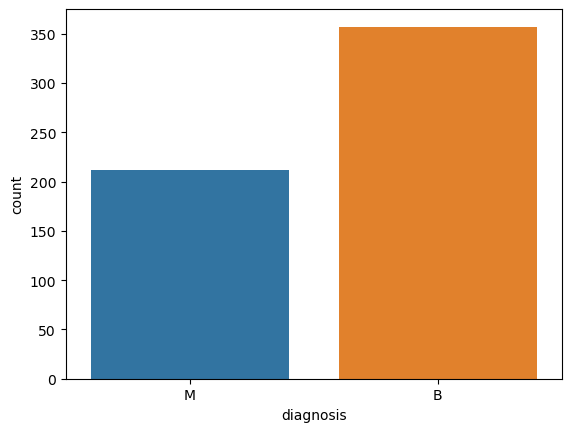

In [14]:
sns.countplot(x='diagnosis', data=breast_cancer_data)
plt.show()

In [15]:
# Label Encoding
breast_cancer_data.replace({'diagnosis': {'B': 0, 'M': 1}}, inplace=True)

In [16]:
breast_cancer_data.groupby('diagnosis').mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [17]:
breast_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Splitting the features and the label

In [18]:
X = breast_cancer_data.drop(columns=['id', 'diagnosis'])
y = breast_cancer_data['diagnosis']

In [25]:
X.shape

(569, 30)

## Splitting the dataset into training set and test set

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

## Feature Scaling

In [35]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Building the Neural Network

In [36]:
# creating the layers of the neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)), # X.shape[1]
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])

In [37]:
# compiling the neaural net
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [38]:
# training the neural net
history = model.fit(X_train, y_train, validation_split=0.1, epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 47ms/step - loss: 0.5443 - accuracy: 0.7726 - val_loss: 0.4313 - val_accuracy: 0.8913
Epoch 2/100
13/13 [==============================] - 0s 8ms/step - loss: 0.3711 - accuracy: 0.8802 - val_loss: 0.3081 - val_accuracy: 0.9130
Epoch 3/100
13/13 [==============================] - 0s 8ms/step - loss: 0.2826 - accuracy: 0.9218 - val_loss: 0.2377 - val_accuracy: 0.9348
Epoch 4/100
13/13 [==============================] - 0s 8ms/step - loss: 0.2316 - accuracy: 0.9315 - val_loss: 0.1928 - val_accuracy: 0.9348
Epoch 5/100
13/13 [==============================] - 0s 7ms/step - loss: 0.1972 - accuracy: 0.9340 - val_loss: 0.1620 - val_accuracy: 0.9348
Epoch 6/100
13/13 [==============================] - 0s 8ms/step - loss: 0.1735 - accuracy: 0.9413 - val_loss: 0.1399 - val_accuracy: 0.9348
Epoch 7/100
13/13 [==============================] - 0s 7ms/step - loss: 0.1558 - accuracy: 0.9438 - val_loss: 0.1224 - val_accuracy: 0.9348
Epoch 8/100


Epoch 59/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0329 - accuracy: 0.9927 - val_loss: 0.0249 - val_accuracy: 1.0000
Epoch 60/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0323 - accuracy: 0.9927 - val_loss: 0.0250 - val_accuracy: 1.0000
Epoch 61/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0318 - accuracy: 0.9927 - val_loss: 0.0249 - val_accuracy: 1.0000
Epoch 62/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0314 - accuracy: 0.9927 - val_loss: 0.0247 - val_accuracy: 1.0000
Epoch 63/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0307 - accuracy: 0.9927 - val_loss: 0.0240 - val_accuracy: 1.0000
Epoch 64/100
13/13 [==============================] - 0s 10ms/step - loss: 0.0302 - accuracy: 0.9927 - val_loss: 0.0239 - val_accuracy: 1.0000
Epoch 65/100
13/13 [==============================] - 0s 9ms/step - loss: 0.0298 - accuracy: 0.9927 - val_loss: 0.0240 - val_accuracy: 1.0000
Epoch

## Visualizing Accuracy & Loss

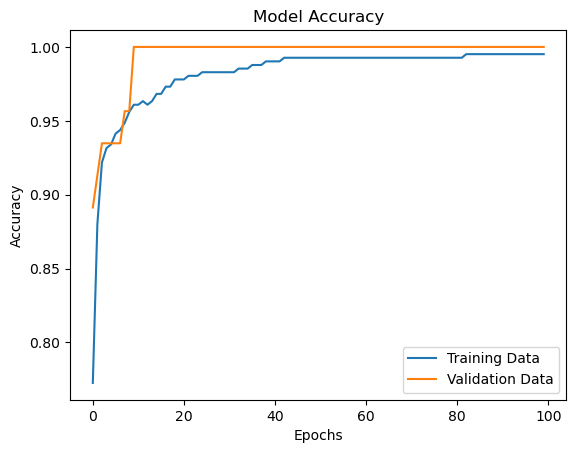

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training Data', 'Validation Data'], loc='lower right')
plt.show()

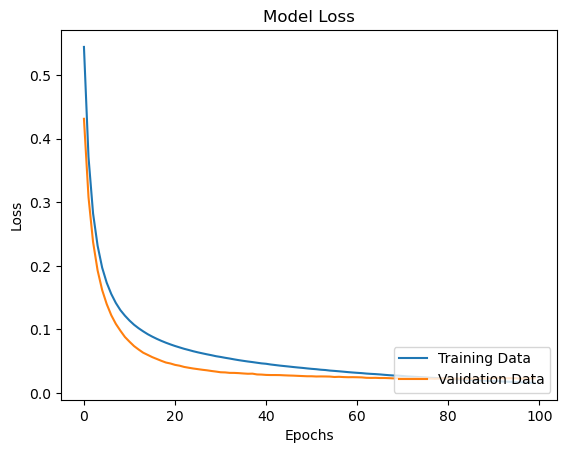

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Data', 'Validation Data'], loc='lower right')
plt.show()

In [63]:
print(history.history)

{'loss': [0.5443422794342041, 0.3711089789867401, 0.2825593948364258, 0.2316163182258606, 0.19719263911247253, 0.17345327138900757, 0.15575677156448364, 0.14171336591243744, 0.13044388592243195, 0.12166274338960648, 0.11403641849756241, 0.10742509365081787, 0.10192790627479553, 0.0970795750617981, 0.09259866178035736, 0.08874746412038803, 0.08525767177343369, 0.08207300305366516, 0.07915221899747849, 0.07649051398038864, 0.0740184336900711, 0.07179940491914749, 0.06960347294807434, 0.06773480027914047, 0.06577268242835999, 0.064043790102005, 0.062469303607940674, 0.060942962765693665, 0.05953414738178253, 0.05795807018876076, 0.056803107261657715, 0.05546586960554123, 0.054290395230054855, 0.0529625304043293, 0.051749132573604584, 0.050670307129621506, 0.049625467509031296, 0.048710595816373825, 0.047684431076049805, 0.046693142503499985, 0.046039968729019165, 0.04493008181452751, 0.04406873509287834, 0.043199796229600906, 0.042450569570064545, 0.04171023517847061, 0.04092162102460861,

## Accuracy of the Model on Test Data

In [41]:
loss, accuracy = model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 5ms/step - loss: 0.1190 - accuracy: 0.9561


In [42]:
print(accuracy)
print(loss)

0.9561403393745422
0.11896384507417679


In [48]:
y_pred_test = model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [50]:
y_pred_test.shape

(114, 2)

In [51]:
y_pred_test[0]

array([0.99827754, 0.04985614], dtype=float32)

In [55]:
np.argmax([10, 20, 78]) # index of max value

2

In [52]:
# converting the probability to class label
y_pred_test_labels = [np.argmax(i) for i in y_pred_test]

In [53]:
y_pred_test_labels

[0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0]

In [58]:
print('Accuracy score = {:.2f}%'.format(accuracy_score(y_test, y_pred_test_labels) * 100))

Accuracy score = 95.61%


In [61]:
print(confusion_matrix(y_test, y_pred_test_labels))

[[69  3]
 [ 2 40]]
